<a href="https://colab.research.google.com/github/NARWADENIK07/DEMO/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show geopy pandas

Name: geopy
Version: 2.4.1
Summary: Python Geocoding Toolbox
Home-page: https://github.com/geopy/geopy
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: geographiclib
Required-by: 
---
Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyrig

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
import folium
from pptx import Presentation
from pptx.util import Inches
import time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cities_air_quality_water_pollution.18-10-2021 (1).csv')

In [ ]:
df.columns = [c.strip().replace('"','').replace(" ","") for c in df.columns]

df.head()

City                   Region                      Country  \
0     New York City               "New York"   "United States of America"   
1  Washington, D.C.   "District of Columbia"   "United States of America"   
2     San Francisco             "California"   "United States of America"   
3            Berlin                       ""                    "Germany"   
4       Los Angeles             "California"   "United States of America"   

   AirQuality  WaterPollution  
0   46.816038       49.504950  
1   66.129032       49.107143  
2   60.514019       43.000000  
3   62.364130       28.612717  
4   36.621622       61.299435

In [ ]:
# Features: AirQuality, WaterPollution
features = ['AirQuality', 'WaterPollution']

df = df.dropna(subset=features)
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k=2, silhouette=0.4437
k=3, silhouette=0.4025
k=4, silhouette=0.4035
k=5, silhouette=0.4007
k=6, silhouette=0.4150
k=7, silhouette=0.4246


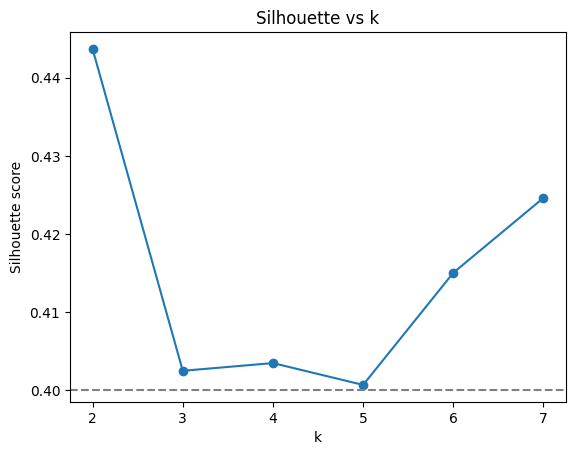

2

In [ ]:
sil_scores = []
K_range = range(2,8)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette={sil:.4f}")

# plot
plt.plot(K_range, sil_scores, '-o')
plt.axhline(0.4, color='gray', linestyle='--')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.show()

best_k = K_range[np.argmax(sil_scores)]
best_k

In [ ]:
km = KMeans(n_clusters=best_k, n_init=20, random_state=42)
df['cluster'] = km.fit_predict(X_scaled)

df.head()

City                   Region                      Country  \
0     New York City               "New York"   "United States of America"   
1  Washington, D.C.   "District of Columbia"   "United States of America"   
2     San Francisco             "California"   "United States of America"   
3            Berlin                       ""                    "Germany"   
4       Los Angeles             "California"   "United States of America"   

   AirQuality  WaterPollution  cluster  
0   46.816038       49.504950        1  
1   66.129032       49.107143        0  
2   60.514019       43.000000        0  
3   62.364130       28.612717        0  
4   36.621622       61.299435        1

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize geolocator
geolocator = Nominatim(user_agent="env_clustering_app")

# Apply rate limiter (prevents blocking)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, return_value_on_exception=None)

# Safe function
def safe_geocode(city, country):
    if pd.isna(city) or pd.isna(country):
        return None, None
    try:
        location = geocode(f"{city}, {country}")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Generate coordinates
latitudes = []
longitudes = []

for city, country in zip(df['City'], df['Country']):
    lat, lon = safe_geocode(city, country)
    latitudes.append(lat)
    longitudes.append(lon)

df["Latitude"] = latitudes
df["Longitude"] = longitudes

df = df.dropna(subset=["Latitude","Longitude"])
df.head()


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 1430, in getresponse
    response.begin()
  File "/usr/lib/python3.12/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 292, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ssl.py", line

City                   Region                      Country  \
0     New York City               "New York"   "United States of America"   
1  Washington, D.C.   "District of Columbia"   "United States of America"   
2     San Francisco             "California"   "United States of America"   
3            Berlin                       ""                    "Germany"   
4       Los Angeles             "California"   "United States of America"   

   AirQuality  WaterPollution  cluster   Latitude   Longitude  
0   46.816038       49.504950        1  40.712728  -74.006015  
1   66.129032       49.107143        0  38.895037  -77.036543  
2   60.514019       43.000000        0  37.779259 -122.419329  
3   62.364130       28.612717        0  52.517389   13.395131  
4   36.621622       61.299435        1  34.053691 -118.242766

In [ ]:
 m = folium.Map(location=[20,0], zoom_start=2)

colors = ['red','blue','green','purple','orange']

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color=colors[row["cluster"]],
        fill=True,
        popup=f"{row['City']} — Cluster {row['cluster']}"
    ).add_to(m)

m.save("cluster_map.html")
m
